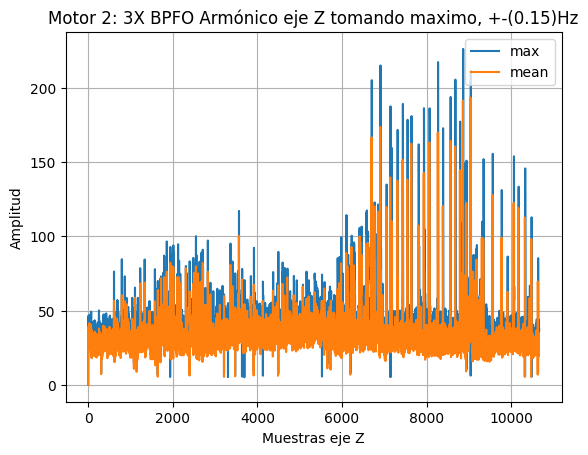

In [4]:
# importing pandas
import pandas as pd
import scipy
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

#fft variables needed
F = 5000 # Sampling frequency
N = 32768 # Number of samples
SIZE = 32767 #Size of csvs
timestep = 1/F
window = np.hanning(N-1)

#directory
all_files=glob.glob("C:/Users/xuans/OneDrive/Escritorio/CEMENTERA/ficheros_motores/Motor_2/Motor2_AxeZ_full/AxeZ/16*.csv")
#all_files=glob.glob("C:/Users/xuans/OneDrive/Escritorio/CEMENTERA/python/prueba/165*.csv")

file_list = []#empty array

#fft frequency
fft_freq = fftfreq(32768,d=timestep)
fft_freq = fft_freq[0:int(N/2)]   

for f in all_files:
    #1º leo el csv correspondiente
    data = pd.read_csv(f)
    if data.size == SIZE:
        data = np.concatenate(data.values.tolist(), axis = 0)
        fft_res = fft(data*window)#2º hago fft al csv
        fft_res = np.abs(fft_res[0:int(N/2)])/N*2
        file_list.append(fft_res)#por ultimo introduzco la informacion al nuevo vector"""
    else:
        exit("Tamaño de archivos incorrecto")    
  

file_list = np.array(file_list)

#Teoric 1X BPFI = +-135 Hz => 1678
x = 964 * 2

#diferencial (siempre el mismo en este caso)
y = 60

#diferencial busqueda
z = 1
z2 = round(0.15* z , 2)

maximum = [0]
means = [0]
max_value = [0]
for elem in file_list:
    max_value = np.argmax(elem[x-y:x+y])
    max_value = (x - y) + max_value
    ma = np.max(elem[max_value-z:max_value+z])
    #ma = np.max(elem[max_value])
    #me = np.mean(elem[max_value])
    me = np.mean(elem[max_value-z:max_value+z])
    if (ma > 5.0):
        maximum.append(ma)
    if (me > 5.0):
        means.append(me)

#pintado

plt.plot(maximum, label="max")
plt.plot(means, label="mean")
plt.title("Motor 2: 3X BPFO Armónico eje Z tomando maximo, +-("+ str(z2) +")Hz")
plt.xlabel("Muestras eje Z")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend(loc="upper right")
save_results_to = 'C:/Users/xuans/OneDrive/Escritorio/CEMENTERA/armonicos_especiales/Motor_2/BPFO/AxeZ/'
plt.savefig(save_results_to + 'BPFO_max_axeZ_desviacion_3X('+ str(z2) +')Hz.png', dpi = 300)